In [4]:
!pip install seaborn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load datasets
orders = pd.read_csv("../data/raw/olist_orders.csv")
order_items = pd.read_csv("../data/raw/olist_order_items.csv")
customers = pd.read_csv("../data/raw/olist_customers.csv")
products = pd.read_csv("../data/raw/olist_products.csv")
reviews = pd.read_csv("../data/raw/olist_order_reviews.csv")

In [9]:
# Basic info
print("Orders shape:", orders.shape)
print("Order Items shape:", order_items.shape)
print("Customers shape:", customers.shape)
print("Products shape:", products.shape)
print("Reviews shape:", reviews.shape)

Orders shape: (99441, 8)
Order Items shape: (112650, 7)
Customers shape: (99441, 5)
Products shape: (32951, 9)
Reviews shape: (99224, 7)


In [8]:
# Peek at first few rows
display(orders.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
# Check missing values in orders
print("Missing values in orders:")
print(orders.isna().sum())

Missing values in orders:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


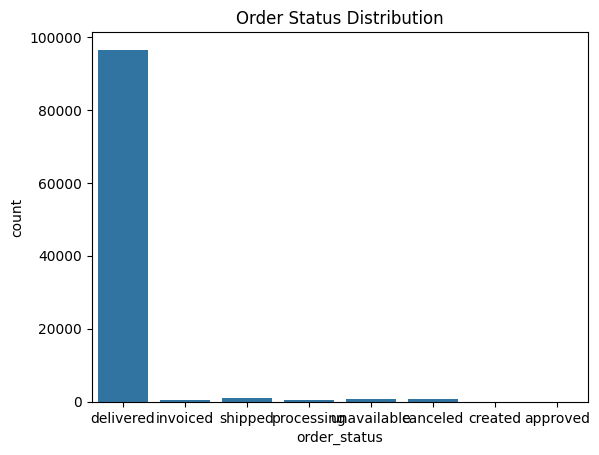

In [11]:
# Distribution of order statuses
sns.countplot(data=orders, x='order_status')
plt.title('Order Status Distribution')
plt.show()

In [12]:
# Merge orders and reviews to see return indicator (using review_score as proxy)
df = orders.merge(reviews, on='order_id', how='left')
df['is_returned'] = df['review_score'].apply(lambda x: 1 if x in [1,2] else 0)

In [13]:
# Return rate
return_rate = df['is_returned'].mean()
print(f"Return rate: {return_rate:.2%}")

Return rate: 14.58%


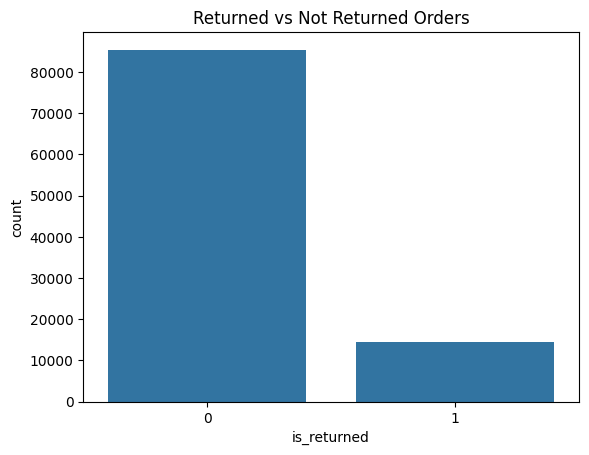

In [14]:
# Visualize return counts
sns.countplot(data=df, x='is_returned')
plt.title('Returned vs Not Returned Orders')
plt.show()

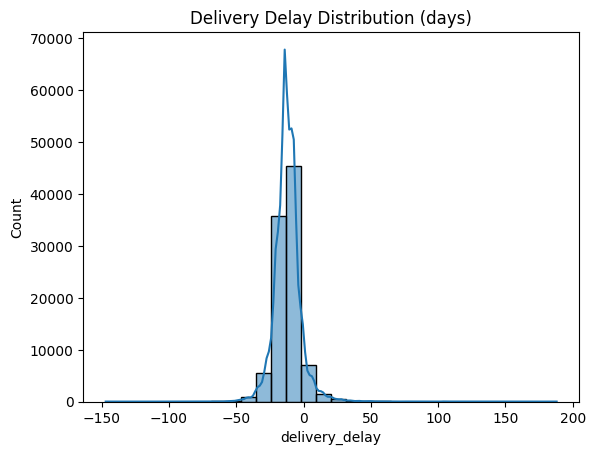

In [15]:
# Delivery delay distribution
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['delivery_delay'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

sns.histplot(df['delivery_delay'].dropna(), bins=30, kde=True)
plt.title('Delivery Delay Distribution (days)')
plt.show()